## Property Rentals in Brazil - Statistical and Exploratory Analysis 

### 1) Introduction:

This project is based on a dataset from Kaggle that displays infomation on property rentals  in Brazil. To conduct this study, I created a fictional real estate company that wants to launch an online marketplace, enabling customers to select properties to rent with more simplicity and transparency. The firm's owners determined that the company won't work with luxury properties. As there aren't any descriptions in the dataset informing the type of each property (e.g. house, flat, apartment, among others), I established that the firm will only work with properties that have at maximum 4 rooms, 4 bathrooms and 3 parking spaces. This will allow us to practice and apply new strategies to filter our data.


OBS: HOA means 'Homeowners association tax'. Please, take into account that all monetary values are in Brazilian Reais (R$).

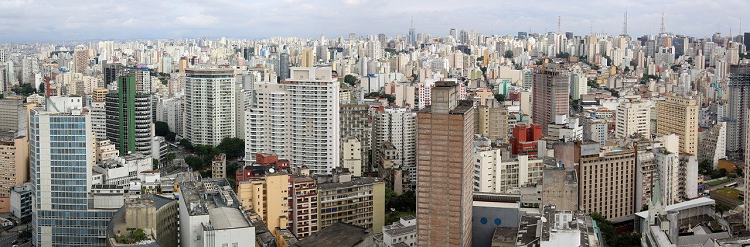

### 1.1) Data Source:

Data Source: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv

### 2) Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 3) Data preparation

Let's import and visualize the dataframe:

In [6]:
all_data=pd.read_csv('houses_to_rent_v2.csv')


# I will have to rename some columns, in order to prevent problems with '$', which is a special character

# This is necessary, especially because I will upload this notebook to GitHub. This special character could create...

#...formatting problems in the html version generated by this platform.


all_data.rename(columns={'hoa (R$)':'hoa',
                          'rent amount (R$)':'rent amount',
                          'property tax (R$)':'property tax',
                        'fire insurance (R$)': 'fire insurance',
                        'total (R$)': 'total'},
                 inplace=True)


all_data

city  area  rooms  bathroom  parking spaces floor     animal  \
0           São Paulo    70      2         1               1     7      acept   
1           São Paulo   320      4         4               0    20      acept   
2        Porto Alegre    80      1         1               1     6      acept   
3        Porto Alegre    51      2         1               0     2      acept   
4           São Paulo    25      1         1               0     1  not acept   
...               ...   ...    ...       ...             ...   ...        ...   
10687    Porto Alegre    63      2         1               1     5  not acept   
10688       São Paulo   285      4         4               4    17      acept   
10689  Rio de Janeiro    70      3         3               0     8  not acept   
10690  Rio de Janeiro   120      2         2               2     8      acept   
10691       São Paulo    80      2         1               0     -      acept   

           furniture   hoa  rent amount  property tax  fire insurance  total  
0          furnished  2065         3300           211              42   5618  
1      not furnished  1200         4960          1750              63   7973  
2      not furnished  1000         2800             0              41   3841  
3      not furnished   270         1112            22              17   1421  
4      not furnished     0          800            25              11    836  
...              ...   ...          ...           ...             ...    ...  
10687      furnished   402         1478            24              22   1926  
10688  not furnished  3100        15000           973             191  19260  
10689      furnished   980         6000           332              78   7390  
10690      furnished  1585        12000           279             155  14020  
10691  not furnished     0         1400           165              22   1587  

[10692 rows x 13 columns]

The dataset has 10692 rows and 13 columns. Let's check for NANs:

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent amount     10692 non-null  int64 
 10  property tax    10692 non-null  int64 
 11  fire insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [8]:
all_data.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

Good! There aren't any NaNs in this dataset. Also, the dtypes of the columns are correct. However, sometimes a null-value or incorrect data can be registered as zero, so we have to check this. Let's analyze the 'area' column, because there is not such thing as an apartment or a house with a null area:

In [9]:
all_data[all_data['area']==0]['area'].count()

0

Ok! We discovered that there isn't any row with an area registered as zero.

Maybe some apartments located at ground floors can be registered as if they were located at a 'floor n° 0', so this is not necessarily an error. But let's check if this happens in this dataset. I am going to use '0' as a string, because the column's dtype is 'object':

In [10]:
all_data[all_data['floor']=='0']['floor'].count()

0

No, there isn' any property located at a hypothetical floor n° 0.

To continue with this analysis, I am going to create a for loop, so we can do it more quickly. Firstly, we have to select the columns that we want to analyze. I am going to leave the property tax out, because in some cases, this value can be paid by the property owner. Also, homeowners association taxes (e.g houses on the streets) may not be mandatory in all properties, so I did not consider it in the analysis below:

In [11]:
cols=['city','animal','furniture','rent amount','fire insurance','total'] 

df_test= all_data[cols]

In [12]:
for column in df_test:
    
    print(df_test[df_test[column]==0][column].count())
    

0
0
0
0
0
0


Another common representation for null values is a hyphen '-'. Let's check if there are any hyphens in the dataset:

In [13]:
for column in all_data:
    
    print(all_data[all_data[column]=='-'][column].count())
    

0
0
0
0
0
2461
0
0
0
0
0
0
0


Apparently, the 'floor' column has 2461 data points registered as a hyphens. Let's check it again:  

In [14]:
all_data[all_data['floor']=='-']

city  area  rooms  bathroom  parking spaces floor animal  \
5           São Paulo   376      3         3               7     -  acept   
15           Campinas   330      4         6               6     -  acept   
19          São Paulo   600      4         5               6     -  acept   
20          São Paulo   100      7         4               0     -  acept   
23          São Paulo    35      1         1               0     -  acept   
...               ...   ...    ...       ...             ...   ...    ...   
10659        Campinas   150      3         2               4     -  acept   
10661        Campinas   250      1         2               2     -  acept   
10668       São Paulo    24      1         1               0     -  acept   
10674  Rio de Janeiro   135      4         2               1     -  acept   
10691       São Paulo    80      2         1               0     -  acept   

           furniture  hoa  rent amount  property tax  fire insurance  total  
5      not furnished    0         8000           834             121   8955  
15         furnished  680         8000           328             121   9129  
19     not furnished    0        12000          9500             181  21680  
20     not furnished    0         3800           118              58   3976  
23     not furnished    0         1100             3              14   1117  
...              ...  ...          ...           ...             ...    ...  
10659      furnished    0         3500           186              53   3739  
10661  not furnished    0         2200           602              34   2836  
10668  not furnished    0          870             0              14    884  
10674  not furnished    0         3300           115              51   3466  
10691  not furnished    0         1400           165              22   1587  

[2461 rows x 13 columns]

We can notice that most of these rows may refer to houses, especially because many of them don't have a Homeowners association tax. As there isn't any property registered as 'floor n° 0' and considering that we are not going to apply aggregate functions on this column, we can convert the hyphens to '0', which will mean 'ground floor' or 'not informed'.

In [15]:
all_data['floor'].replace({'-': '0'}, inplace=True) # '0' to respect the column's dtype for now, which is currently defined as 'object'

Let's check if it worked:

In [16]:
for column in all_data:
    
    print(all_data[all_data[column]=='-'][column].count())

0
0
0
0
0
0
0
0
0
0
0
0
0


In [17]:
all_data[all_data['floor']=='0']['floor'].count()

2461

Yes! It worked! Now, let's convert this column's dtype to 'int64'. We are not going to use aggregate functions on the 'floor' column, but a 'int64' dtype will allow us to generate summary statistics (aggregate functions like the 'mean' and quartiles are not going to be valid, but we can get some insights on the 'minimum' and 'maximum' floor numbers), which can help us to conduct an outlier analysis on this column. 

In [18]:
all_data['floor']=pd.to_numeric(all_data['floor'])

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking spaces  10692 non-null  int64 
 5   floor           10692 non-null  int64 
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent amount     10692 non-null  int64 
 10  property tax    10692 non-null  int64 
 11  fire insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


### 4) Statistical Analysis

Now, let's generate summary statistics for this dataframe:

In [20]:
all_data.describe().T

count         mean           std    min      25%     50%  \
area            10692.0   149.217920    537.016942   11.0    56.00    90.0   
rooms           10692.0     2.506079      1.171266    1.0     2.00     2.0   
bathroom        10692.0     2.236813      1.407198    1.0     1.00     2.0   
parking spaces  10692.0     1.609147      1.589521    0.0     0.00     1.0   
floor           10692.0     5.067995      6.069050    0.0     1.00     3.0   
hoa             10692.0  1174.021698  15592.305248    0.0   170.00   560.0   
rent amount     10692.0  3896.247194   3408.545518  450.0  1530.00  2661.0   
property tax    10692.0   366.704358   3107.832321    0.0    38.00   125.0   
fire insurance  10692.0    53.300879     47.768031    3.0    21.00    36.0   
total           10692.0  5490.487000  16484.725912  499.0  2061.75  3581.5   

                   75%        max  
area             182.0    46335.0  
rooms              3.0       13.0  
bathroom           3.0       10.0  
parking spaces     2.0       12.0  
floor              8.0      301.0  
hoa             1237.5  1117000.0  
rent amount     5000.0    45000.0  
property tax     375.0   313700.0  
fire insurance    68.0      677.0  
total           6768.0  1120000.0

#### Important points:


#### 1) In 50 % of the properties:



- the properties' total areas are 90 m2 or less.

    
- they have 2 rooms or less.

    
- they have 2 bathrooms or less

    
- 1 parking space or less.

    
- Homeowners association tax is 560.00 or less

    
- Rent amount is 2661.00 or less

    
- property tax is 125.00 or less

    
- fire insurance is 36.00 or less

    
- and the total amount paid is 3581.5 or less.
    

The insights above could help a real state company to determine the prices of their rents according to each type of property.



#### 2) Possible relevant diferences between the mean and the median for the following variables:


- area, hoa, rent amount, property tax, fire insurance, and total amount paid. Let's conduct an outlier analysis to get more insights on this.



#### 3) The min. and max. values of some columns also indicate that an outlier detection study may be relevant. 




The difference between the min. and max. values are too extreme in some cases. We should pay attention to the following cases:




- Area: 11 m2 (min) and 46.335 (max). 

    
      - A property of 46.335 is an outlier. Probably due to a typo error. For instance, the biggest mansion in the U.S has 8 thousand m2. Link: http://g1.globo.com/economia-e-negocios/noticia/2010/06/mansao-com-tamanho-de-2-campos-de-futebol-esta-venda-nos-eua.html. Also, an apartment of 11m2 may be too small (maybe it could be a room for rental). We will check it later.
    
    
    
- Rooms: 1 (min) and 13 (max). 

    
      - Maybe a house or a luxury apartment may have 13 rooms.However, we should consider the possibility of eliminating this as an outlier in the next steps of this study.
    
    
    
- Bathroom: 1 (min) and 10 (max). 



    
      - Similar case in comparison to the previous column.
    
    
    
    
- Parking Spaces: 0 (min) and 12 (max).
    
    
    
      - Similar case.
        
        
        
        
      
-  Homeowners association tax: 0 (min) and 1117000.00 (max).


    
         - More than 1 million as homeowners association tax is an outlier. 
      
      
         
     
- Rent Amount: 450.00 (min) and 45000.00 (max).


     
      - 45000.00 for rent? This is 100 times the minimum rent in the dataset. It is an outlier too.
         
         
         
         
- Property Tax: 0 (min) and 313700.0 (max).


     
      -  Similar case.
    
      
         
     
- fire insurance: 3 (min) and 677 (max).


     
       - 3 looks too low. Let's check this in the next parts of this study.
         
     
     
     
- total: 499.00 (min) and 1120000.00 (max).


     
      - total expenses of more than 1 million per month? Also, looks as an outlier (maybe it is a premium luxury mansion or a typo error).

### 4.1) Outlier detection

Ok! Now, we need to select only the columns that have numerical values. 

In [21]:
data_numerical=all_data[['area','rooms','bathroom','parking spaces',
                        'floor','hoa','rent amount',
                        'property tax','fire insurance','total']]

In [22]:
data_numerical.head()

area  rooms  bathroom  parking spaces  floor   hoa  rent amount  \
0    70      2         1               1      7  2065         3300   
1   320      4         4               0     20  1200         4960   
2    80      1         1               1      6  1000         2800   
3    51      2         1               0      2   270         1112   
4    25      1         1               0      1     0          800   

   property tax  fire insurance  total  
0           211              42   5618  
1          1750              63   7973  
2             0              41   3841  
3            22              17   1421  
4            25              11    836

In [23]:
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   area            10692 non-null  int64
 1   rooms           10692 non-null  int64
 2   bathroom        10692 non-null  int64
 3   parking spaces  10692 non-null  int64
 4   floor           10692 non-null  int64
 5   hoa             10692 non-null  int64
 6   rent amount     10692 non-null  int64
 7   property tax    10692 non-null  int64
 8   fire insurance  10692 non-null  int64
 9   total           10692 non-null  int64
dtypes: int64(10)
memory usage: 835.4 KB


Now, let's analyze the columns as 1-Dimensional data with scatterplots.I know that scatterplots are mainly used for continuous data. Here, in many columns we have discrete data, so this means that some charts are going to look strange, because the data is going to be distributed in columns/lines. However, we are still going to be able to identify the outliers of our dataset, which is our goal here. Also, as the company does not work with apartments that have more than 4 rooms, 4 bathrooms and 3 parking spaces, we will have to filter the values of these columns anyway. Therefore, we can proceed and plot this type of chart.

Don't worry about the y axis of the scatter plots, because it is not going to offer us valuable information, considering that it is composed by random values generated by 'np.random.normal'. We had to do that to generate a boolean mask to color 'good data' in green and 'outliers' in red. We are going to select a threshold of 3 standard deviations above or below the mean, which corresponds to 99.73% of the total area of a normal distribution. Any value above or below this are will be labelled as an outlier:



Column: area
N° of Outliers detected: 5 Outliers.




Column: rooms
N° of Outliers detected: 52 Outliers.


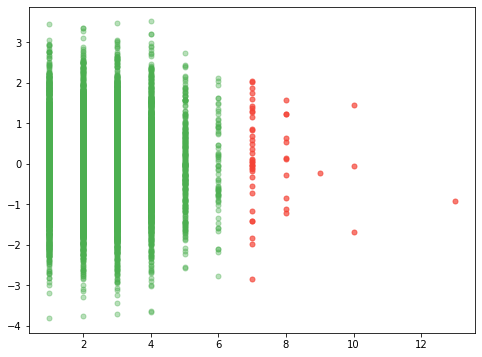



Column: bathroom
N° of Outliers detected: 103 Outliers.




Column: parking spaces
N° of Outliers detected: 159 Outliers.


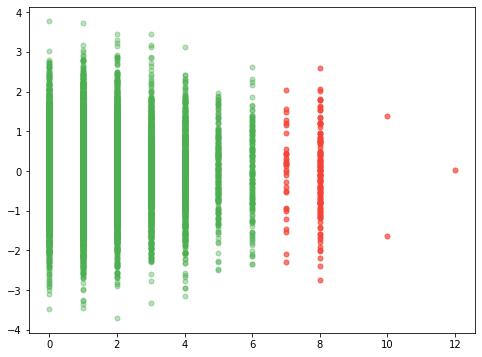



Column: floor
N° of Outliers detected: 89 Outliers.


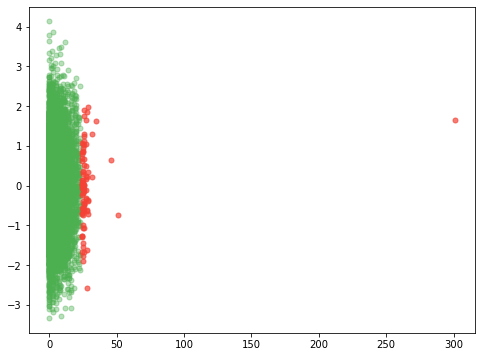



Column: hoa
N° of Outliers detected: 5 Outliers.


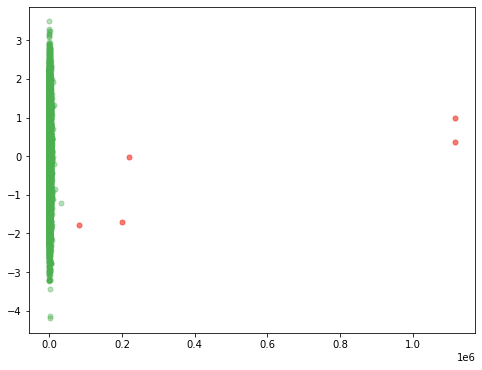



Column: rent amount
N° of Outliers detected: 256 Outliers.


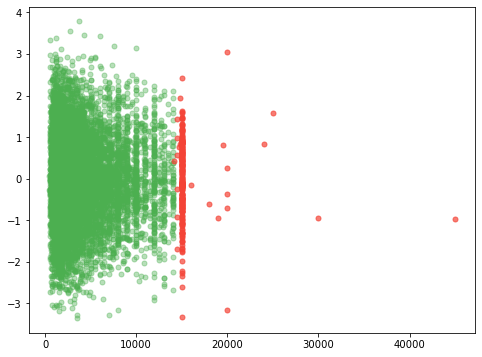



Column: property tax
N° of Outliers detected: 6 Outliers.


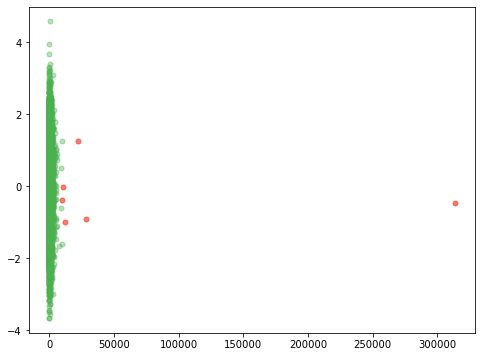



Column: fire insurance
N° of Outliers detected: 178 Outliers.


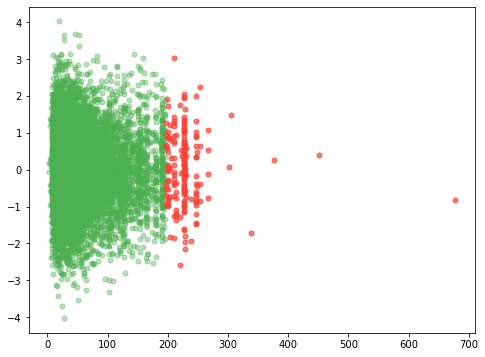



Column: total
N° of Outliers detected: 6 Outliers.


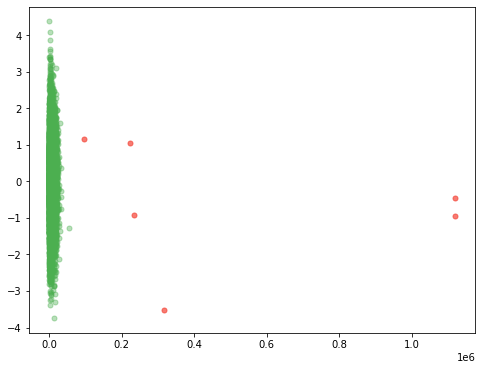

In [24]:
from scipy.stats import norm

for column in data_numerical:
    
    threshold=3 # 3 standard deviations from the mean is our threshold
    
    mean,std=np.mean(data_numerical[column]), np.std(data_numerical[column]) #mean and standard deviation
    
    z_score=np.abs((data_numerical[column]-mean)/std) # z_score
    
    good=z_score<threshold # data that is below the threshold (3 standard deviations from the mean)
    
    print("\n")
    
    print("\033[1m"+'Column:'+"\033[1m", "\033[1m" +column+"\033[1m") # title
    
    print(f'N° of Outliers detected: {(~good).sum() } Outliers.') # N° of outliers detected
    
    boolean_mask=np.random.normal(size=data_numerical[column].size) # boolean_mask (y-axis)
    
    
    plt.figure(figsize=(8,6))
    
    plt.scatter(data_numerical[column][good], boolean_mask[good], s=25,alpha=0.4, label='Good Data', color='#4CAF50')
    
    plt.scatter(data_numerical[column][~good], boolean_mask[~good], s=25, alpha=0.7, label='Outliers', color='#F44336')
    
    
    plt.show()


Link: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

To eliminate the outliers we have to write the following code:

- from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


It calculates the z_score of each value, considering each column's mean and standard deviation. The absolute value of the z_score is used, because we only have to know if the value is below the limit of 3 standard deviations from the mean. After this, 'all(axis=1)' guarantees that for each row, all columns have a z_score below that is below the threshold. In the end, the code return only the rows that are below this limit of 3 standard deviations from the mean, excluding the outliers (in red) that we see in the scatterplots above.

I am going to use 'select_dtypes(include=np.number)' in order to select only the columns with numerical values to calculate the z-score:

In [25]:
from scipy import stats

good_data= all_data[(np.abs(stats.zscore(all_data.select_dtypes(include=np.number))) < 3).all(axis=1)]

good_data

city  area  rooms  bathroom  parking spaces  floor  \
0           São Paulo    70      2         1               1      7   
1           São Paulo   320      4         4               0     20   
2        Porto Alegre    80      1         1               1      6   
3        Porto Alegre    51      2         1               0      2   
4           São Paulo    25      1         1               0      1   
...               ...   ...    ...       ...             ...    ...   
10686       São Paulo   150      3         3               2      8   
10687    Porto Alegre    63      2         1               1      5   
10689  Rio de Janeiro    70      3         3               0      8   
10690  Rio de Janeiro   120      2         2               2      8   
10691       São Paulo    80      2         1               0      0   

          animal      furniture   hoa  rent amount  property tax  \
0          acept      furnished  2065         3300           211   
1          acept  not furnished  1200         4960          1750   
2          acept  not furnished  1000         2800             0   
3          acept  not furnished   270         1112            22   
4      not acept  not furnished     0          800            25   
...          ...            ...   ...          ...           ...   
10686  not acept      furnished     0        13500             0   
10687  not acept      furnished   402         1478            24   
10689  not acept      furnished   980         6000           332   
10690      acept      furnished  1585        12000           279   
10691      acept  not furnished     0         1400           165   

       fire insurance  total  
0                  42   5618  
1                  63   7973  
2                  41   3841  
3                  17   1421  
4                  11    836  
...               ...    ...  
10686             172  13670  
10687              22   1926  
10689              78   7390  
10690             155  14020  
10691              22   1587  

[10082 rows x 13 columns]

In [26]:
10692 - 10082

610

In [27]:
(610/10692)*100

5.705200149644594

Good! We eliminated 610 rows to exclude the outliers, which represent 5,70% of the original dataset. Please, remember that the decision to eliminate outliers depend on many factors. If the outliers are not so extreme, the team can analyze if its worth it to delete them or not. Considering the objectives of the fictional company in this case, I made the decision to exclude the outliers, especially due to two factors: some of them have really extreme values; and this firm does not work with luxury apartments.

### 4.2) Filter data

Let's check how the dataset is now, in order to identify if we need to filter the data even more:

In [28]:
good_data.describe().round(2).T

count     mean      std    min     25%     50%      75%  \
area            10082.0   127.06   109.20   11.0    55.0    87.0   164.00   
rooms           10082.0     2.42     1.08    1.0     2.0     2.0     3.00   
bathroom        10082.0     2.11     1.26    1.0     1.0     2.0     3.00   
parking spaces  10082.0     1.44     1.34    0.0     0.0     1.0     2.00   
floor           10082.0     4.95     4.96    0.0     1.0     3.0     8.00   
hoa             10082.0   888.83  1070.88    0.0   200.0   566.5  1200.00   
rent amount     10082.0  3477.06  2771.31  450.0  1500.0  2500.0  4500.00   
property tax    10082.0   282.38   459.41    0.0    34.0   116.0   332.00   
fire insurance  10082.0    47.18    37.96    3.0    20.0    34.0    61.00   
total           10082.0  4695.63  3754.64  499.0  2001.5  3394.5  6138.75   

                    max  
area             1600.0  
rooms               6.0  
bathroom            6.0  
parking spaces      6.0  
floor              23.0  
hoa             32000.0  
rent amount     14080.0  
property tax     9500.0  
fire insurance    196.0  
total           32750.0

Considering that the firm only works with properties that have at maximum 4 rooms, 4 bathrooms and 3 parking spaces we have to filter the data:

In [29]:
final_data=good_data[(good_data['rooms'] <= 4) & (good_data['bathroom'] <= 4) & (good_data['parking spaces'] <= 3)]

display(final_data)

city  area  rooms  bathroom  parking spaces  floor  \
0           São Paulo    70      2         1               1      7   
1           São Paulo   320      4         4               0     20   
2        Porto Alegre    80      1         1               1      6   
3        Porto Alegre    51      2         1               0      2   
4           São Paulo    25      1         1               0      1   
...               ...   ...    ...       ...             ...    ...   
10686       São Paulo   150      3         3               2      8   
10687    Porto Alegre    63      2         1               1      5   
10689  Rio de Janeiro    70      3         3               0      8   
10690  Rio de Janeiro   120      2         2               2      8   
10691       São Paulo    80      2         1               0      0   

          animal      furniture   hoa  rent amount  property tax  \
0          acept      furnished  2065         3300           211   
1          acept  not furnished  1200         4960          1750   
2          acept  not furnished  1000         2800             0   
3          acept  not furnished   270         1112            22   
4      not acept  not furnished     0          800            25   
...          ...            ...   ...          ...           ...   
10686  not acept      furnished     0        13500             0   
10687  not acept      furnished   402         1478            24   
10689  not acept      furnished   980         6000           332   
10690      acept      furnished  1585        12000           279   
10691      acept  not furnished     0         1400           165   

       fire insurance  total  
0                  42   5618  
1                  63   7973  
2                  41   3841  
3                  17   1421  
4                  11    836  
...               ...    ...  
10686             172  13670  
10687              22   1926  
10689              78   7390  
10690             155  14020  
10691              22   1587  

[8776 rows x 13 columns]

Ok!  Now, we have our final dataframe. Let's create a correlation matrix with a heatmap, so we can understand the relationship between the numerical variables:

### 4.3) Correlation Matrix

In [30]:
only_numerical=final_data.select_dtypes(include=np.number) #only numerical columns

In [31]:
only_numerical

area  rooms  bathroom  parking spaces  floor   hoa  rent amount  \
0        70      2         1               1      7  2065         3300   
1       320      4         4               0     20  1200         4960   
2        80      1         1               1      6  1000         2800   
3        51      2         1               0      2   270         1112   
4        25      1         1               0      1     0          800   
...     ...    ...       ...             ...    ...   ...          ...   
10686   150      3         3               2      8     0        13500   
10687    63      2         1               1      5   402         1478   
10689    70      3         3               0      8   980         6000   
10690   120      2         2               2      8  1585        12000   
10691    80      2         1               0      0     0         1400   

       property tax  fire insurance  total  
0               211              42   5618  
1              1750              63   7973  
2                 0              41   3841  
3                22              17   1421  
4                25              11    836  
...             ...             ...    ...  
10686             0             172  13670  
10687            24              22   1926  
10689           332              78   7390  
10690           279             155  14020  
10691           165              22   1587  

[8776 rows x 10 columns]

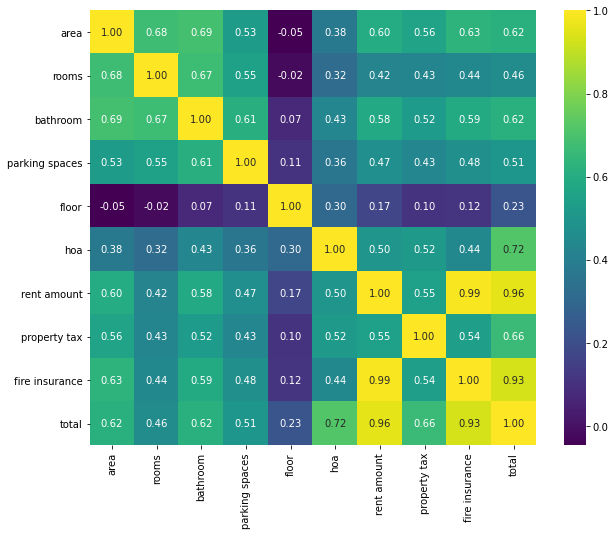

In [32]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(only_numerical.corr(), annot=True, cmap='viridis', fmt='0.2f')


plt.show()

We can notice that the area of the property (0.60) and the number of bathrooms (0.58) seem to have a higher positive influence on rent than the number of parking spaces (0.47) and rooms (0.42).

### 5) Exploratory Analysis

### 5.1) Rent 

Let's start by analyzing the rent that is charged from customers in all cities:

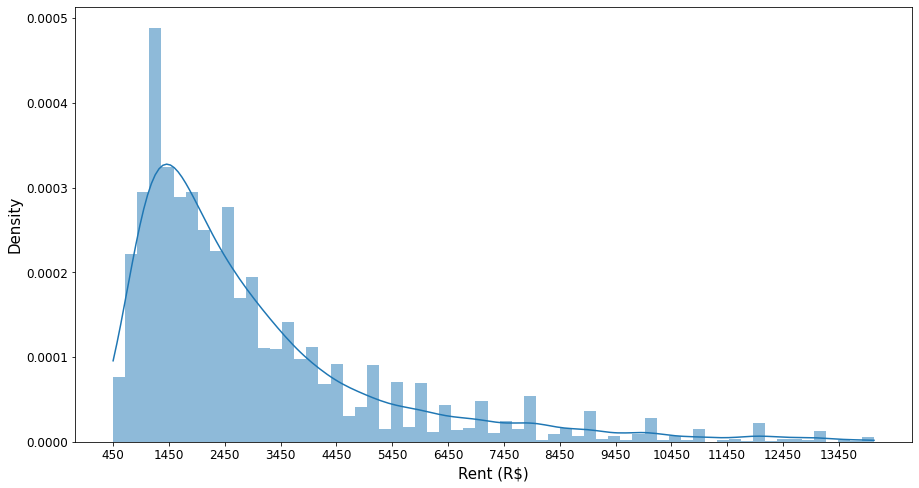

In [33]:
# https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/density-curves/v/density-curves

plt.figure(figsize=(15,8))


plt.rcParams["axes.labelsize"] = 15


plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)


ch_rent=sns.histplot(final_data['rent amount'], kde=True, stat="density", linewidth=0)


ch_rent.set(xlabel="Rent (R$)")

plt.xticks(np.arange(final_data['rent amount'].min(), final_data['rent amount'].max(), step=1000))

plt.show()

We can see that the chart above is right-skewed (long tail on the right). Let's use plotly to identify the most representative ranges:

In [34]:
import plotly.express as px

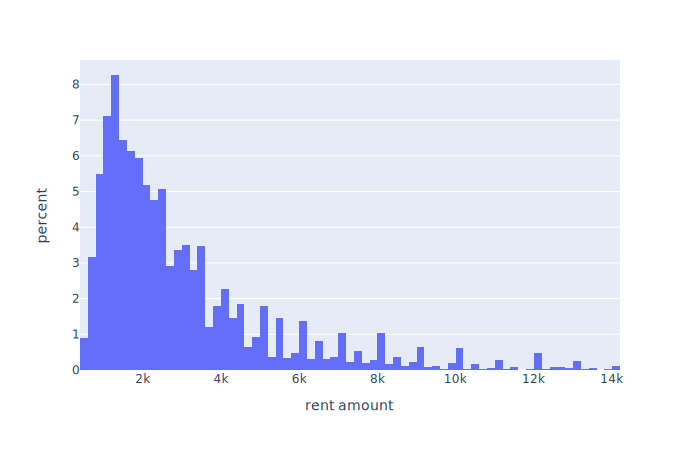

In [35]:
ch_rent=px.histogram(data_frame=final_data, x=final_data['rent amount'],
            histnorm='percent')

ch_rent.show('svg')

Rents from R\\$ 1200 to R\\$ 1399 (8,25%), R\\$ 1000 to R\\$ 1199 (7,11%) and R\\$ 1400 and R\\$ 1599 (6,44%) are the most representative ranges. In a general perspective, most rents are located bewtween R\\$800 and R\\$ 2599 (aprox. 54,4%).

Now, I will analyze the distribution of the rent amount in each city:

In [36]:
cities=final_data['city'].unique()

cities

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

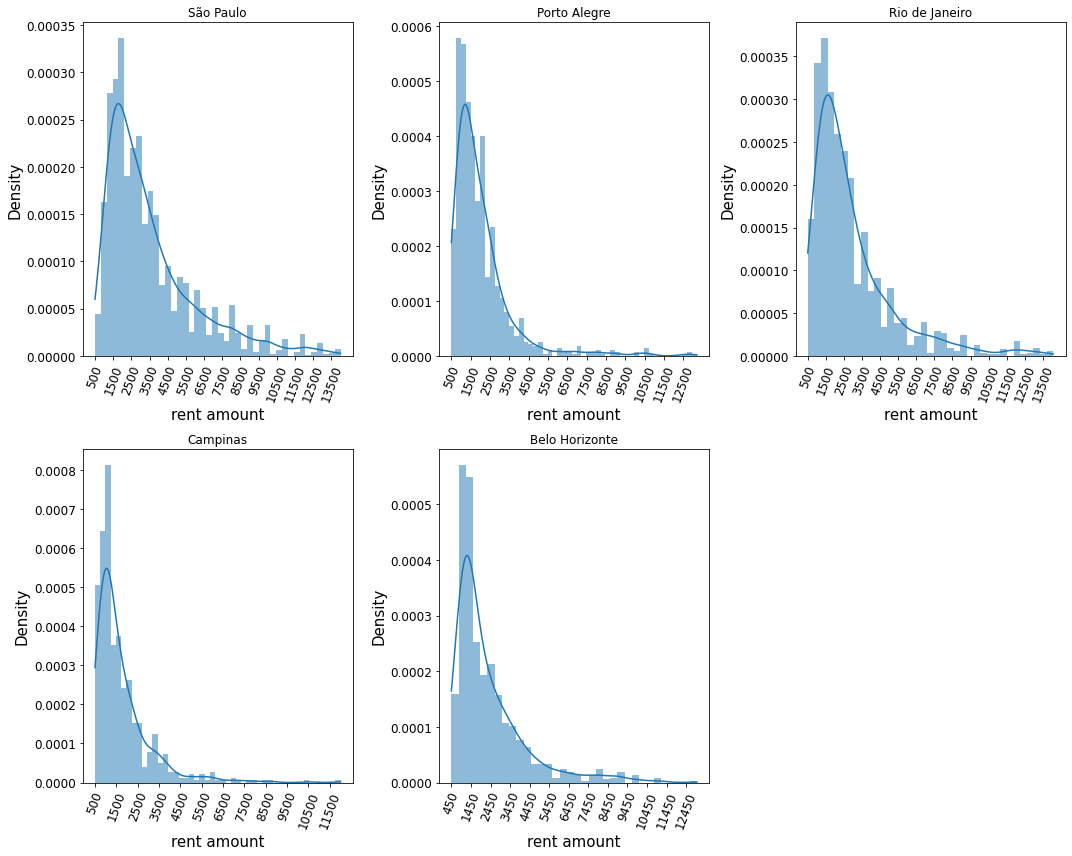

In [51]:
plt.figure(figsize=(15, 12))

i = 1

for city in cities:
    
    
    plt.subplot(2, 3, i) #grid of 2 rows and 3 columns. i is the position on the grid
    plt.title(city)
    city_column = final_data[final_data['city'] == city]  
    sns.histplot(city_column['rent amount'],kde=True, stat="density", linewidth=0) # 'city_column['rent amount (R$)']' is a Series
    plt.xticks(np.arange(city_column['rent amount'].min(), city_column['rent amount'].max(), step=1000),
              rotation=70)
    
    
    i+=1 #to order the subplots
    
plt.tight_layout() # Adjust the padding between and around subplots.
plt.show()

All charts have a long tail on the right. However, the peaks are different in each city. For instance, in Campinas, the peak is below R$1500. On the other hand, in São Paulo, the peak appears to be somwhere between 2000 and 2500. Also, higher rents are much more representative in São Paulo (from R\\$3000 onwards) than in other cities, where the percentage of rents in this range is almost null, except from Rio (higher rents also have an interesting representativeness in Rio, but in a lower level compared to São Paulo). This result was expected, because São Paulo  is Brazil's economic Hub and its most populated city.

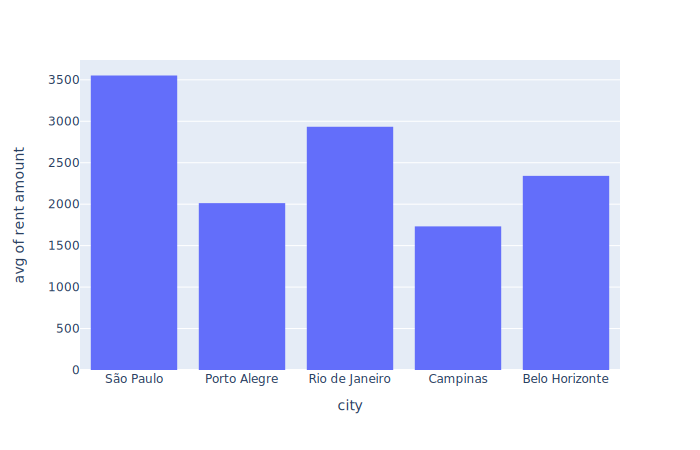

In [38]:
ch2_rent=px.histogram(data_frame=final_data, x='city', y='rent amount',
            histfunc='avg')

ch2_rent.show('svg')

Above, we can see the average rent charged by property owners in each city, which are the following: São Paulo (3,551.92), Rio de Janeiro (2,933.52), Belo Horizonte (2,341.35), Porto Alegre (2,012.60) and Campinas (1,732.20). All values are in Brazilian Reais (R$).

### 5.2) Area (m2)

Just to practice, let's try to automate the processes to create histplots:

In [56]:
def create_histplot(data, select_step, select_bins):

    plt.figure(figsize=(15,8))


    plt.rcParams["axes.labelsize"] = 15


    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)


    ch_hist=sns.histplot(data,  bins=select_bins, kde=True, stat="density", linewidth=0)


    plt.xticks(np.arange(data.min(), data.max(), step=select_step), rotation=70)

    plt.show()
    
    
def create_multiple_histplots(dataset, data_column,select_step, select_bins, limit_x):
    

    plt.figure(figsize=(16, 12))

    i = 1

    for city in cities:


        plt.subplot(2, 3, i) 
        plt.title(city)
        city_column = dataset[dataset['city'] == city]  
        chart=sns.histplot(city_column[data_column],bins=select_bins, kde=True, stat="density", linewidth=0) 

        plt.xticks(np.arange(0,500, step=select_step),
                  rotation=70)
        
        xaxis=plt.gca()
        xaxis.tick_params(axis='x', labelsize=16)
        
        
        chart.set(xlim=limit_x)
        
        chart.margins(x=0.01)

        i+=1 

    plt.tight_layout() 
    plt.show()

Let's see how the area is distributed in the aggregated data:

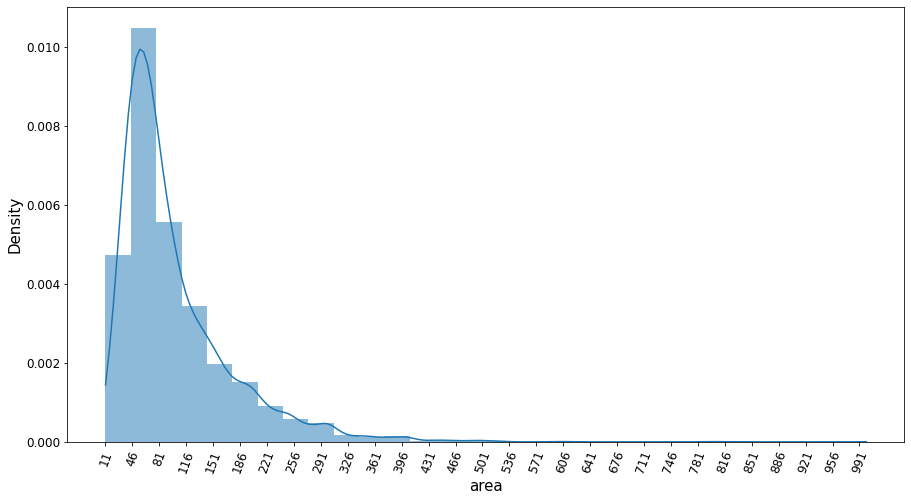

In [40]:
create_histplot(final_data['area'],select_step=35,select_bins=30)

The most representative ranges are the following: 46 to 81 m2 (1st), 81 to 116 m2 (2nd) and 11 to 46 m2 (3rd).

Now, let's see how this is distributed in each city:

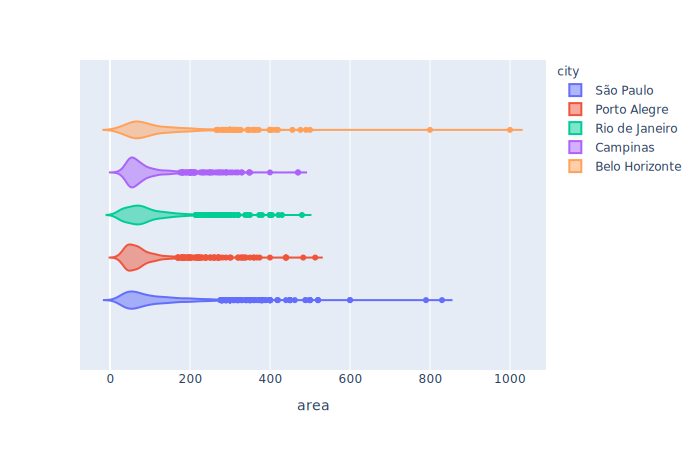

In [41]:
ch3_area=px.violin(data_frame=final_data, x=final_data['area'],
            color='city')

ch3_area.show('svg')

The biggest properties are located in Belo Horizonte and São Paulo. In the histograms below, we are not going to include the properties with the largest areas in these two cities, so we can have a higher definition on each chart. 

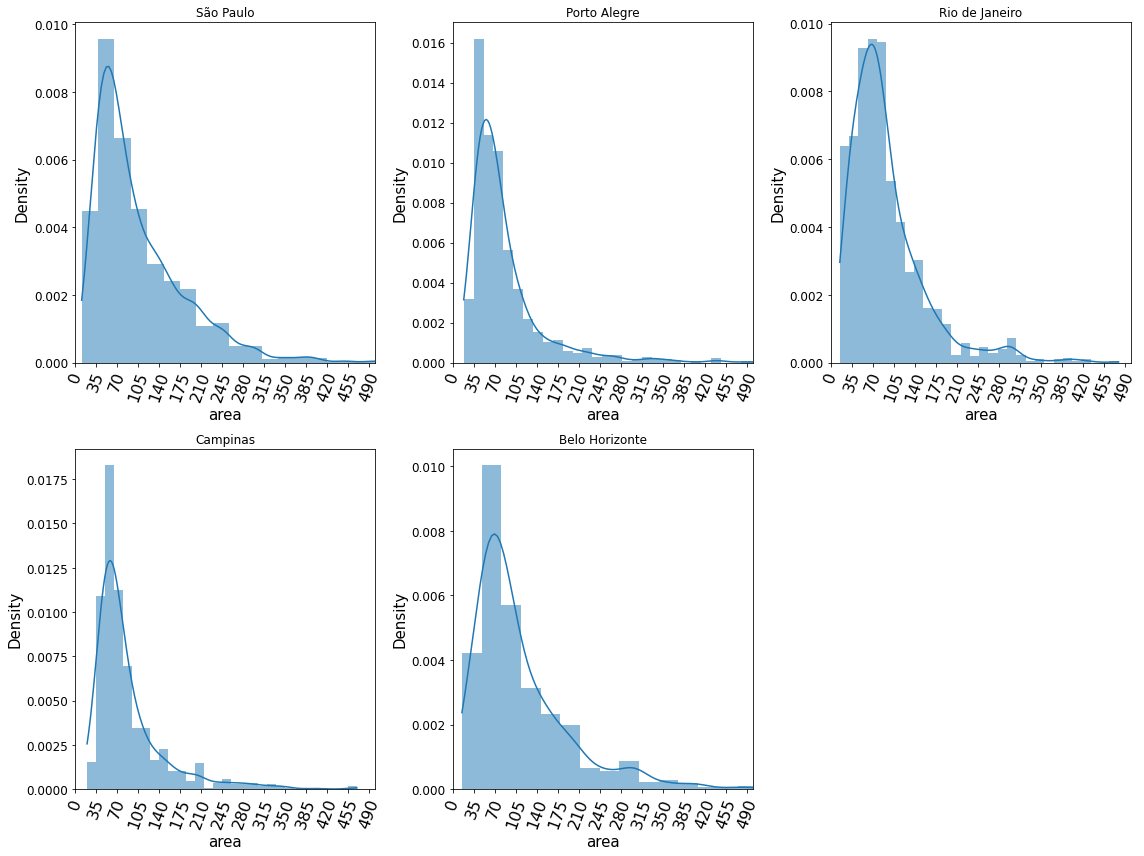

In [57]:
create_multiple_histplots(final_data, 'area', 35, 30, limit_x=(0, 500))

In Porto Alegre and Campinas, the density curves seem to go down faster. This means that the properties' areas in these two cities are more concentrated in a few ranges (bins on the left). On the other hand, in the other three cities, especially in São Paulo, there is a considerable amount of properties with larger areas (from 105 m2 onwards). The peaks in São Paulo, Campinas and Porto Alegre are in the 35-70 m2 range, in Belo Horizonte and in Rio the peaks are slightly to the right (the maximum area in each range seem to surpass 70 m2). Therefore, this means that are more properties available to rent in the previously mentioned squared metreage.

### 5.3) Properties available in each city

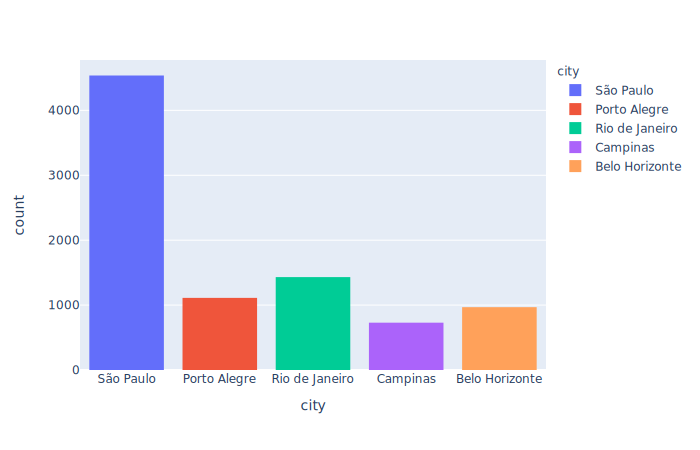

In [43]:
ch4_pro=px.histogram(final_data, x="city", color='city')

ch4_pro.show('svg') # We need static charts for them to appear in GitHub (plotly interactive charts are not supported)

4537 properties are located in São Paulo, which represents 51,7% of our dataset. Rio de Janeiro is in the second position in the ranking with 1431 properties, which is a much lower proportion (16,3%). Now, let's analyze categorical variables:

### Categorical Variables:

### 5.4) Animals

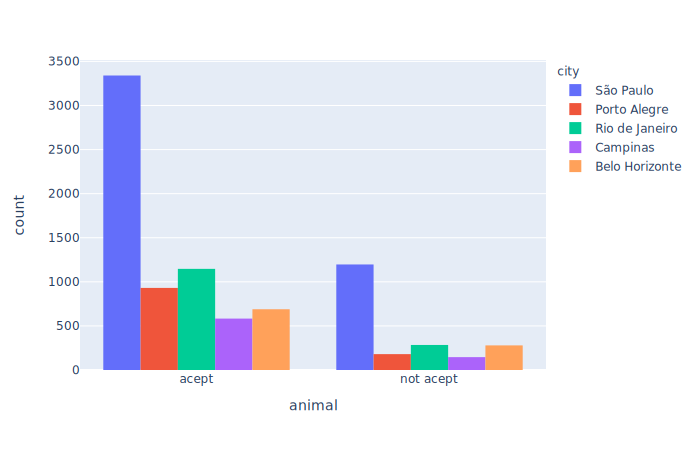

In [44]:
ch5_pets=px.histogram(final_data, x="animal", color='city', barmode='group')

ch5_pets.show('svg')

As the majority of the properties are located in São Paulo and Rio, if we consider only absolute values, it is natural that more property owners will accept pets in these cities. However, if we consider relative frequencies, we can see that Porto Alegre is the city that has the highest acceptance rate for pets: 83,8% of properties accept pets. The acceptance rate in the other cities are: Rio (80,15%), Campinas (80%), São Paulo (73,62%) and Belo Horizonte (71,2%).

### 5.4.1) Do properties that accept pets have a higher rent?

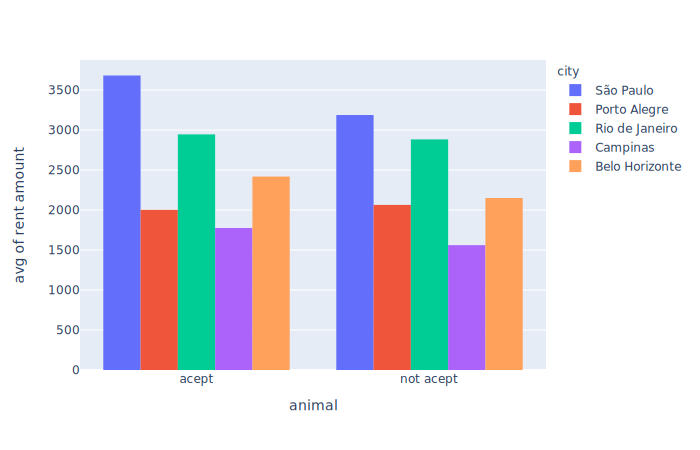

In [45]:
ch6_pets_avg=px.histogram(data_frame=final_data, x='animal', y='rent amount', color='city',
            histfunc='avg', barmode='group')


ch6_pets_avg.show('svg')

Except from Porto Alegre, the average rent is higher for the properties that accept pets. In São Paulo, the average rent for properties that accept pets is aprox. R\$ 494,00 higher.

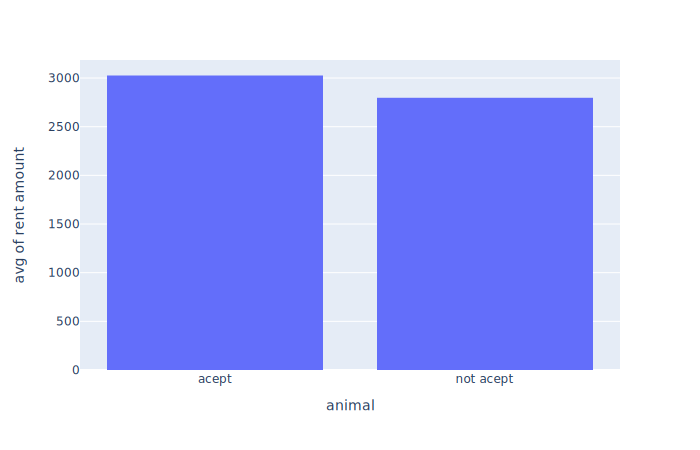

In [46]:
ch7_pets_tavg=px.histogram(data_frame=final_data, x='animal', y='rent amount',
            histfunc='avg')

ch7_pets_tavg.show('svg')

If we analyze the overall dataset, the difference of the average rent charged by property owners that accept and do not accept pets is only R$228,92. This represents a variation of aprox. 8,2%.

### 5.5) Furniture

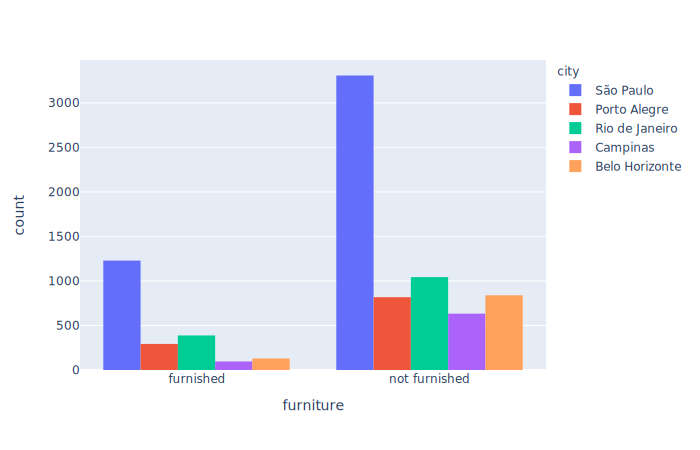

In [47]:
ch8_furn=px.histogram(final_data, x="furniture", color='city', barmode='group')

ch8_furn.show('svg')

Most properties are not furnished. In Campinas, 86,83% of the properties are not furnished. The rate in other cities is the following:  Belo Horizonte (86,67%), Porto Alegre (73,62%), São Paulo (72,91%), and Rio (72,88%).

### 5.5.1) Do furnished properties impact rent positively?

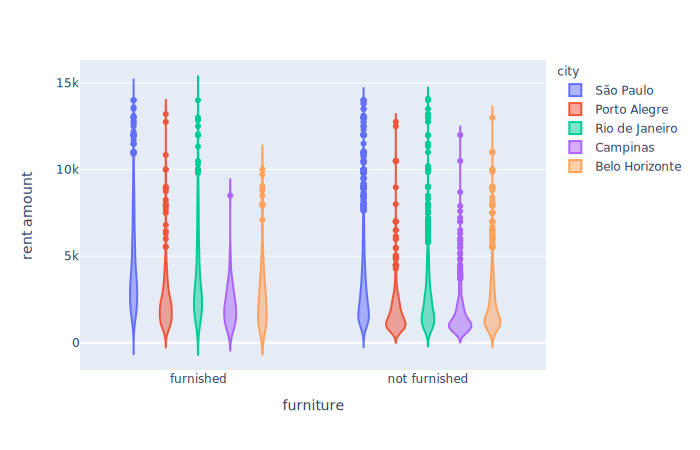

In [48]:
ch9_furn_vio=px.violin(data_frame=final_data, x='furniture', y='rent amount', color='city')

ch9_furn_vio.show('svg')

In Campinas and Belo Horizonte, some properties with no furniture have higher rents, in comparison to the maximum charged for places with furniture in these cities. On the other hand, in São Paulo, Porto Alegre and Rio, some properties with furniture have higher rents than the ones that do not offer this feature. Despite this, these differences are not sufficiently relevant for us to make assumptions on this by just looking at the chart above. Let's analyze the averages:

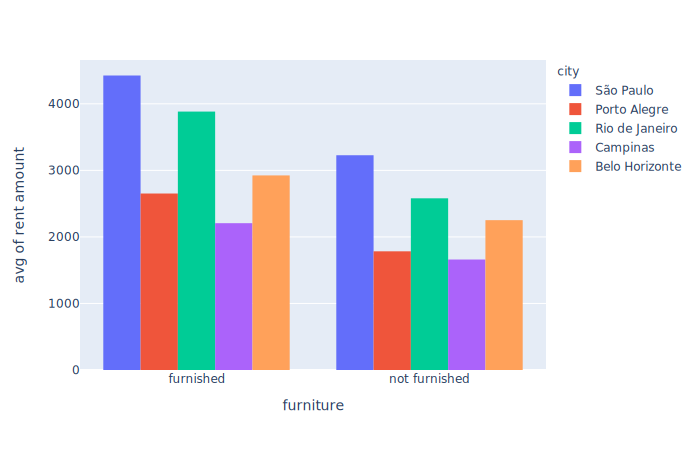

In [49]:
ch10_furn_avg=px.histogram(data_frame=final_data, x='furniture', y='rent amount', color='city',
            histfunc='avg', barmode='group')

ch10_furn_avg.show('svg')

After analyzing the chart above, we can identify that the average rent charged by the owners is higher for furnished properties than in unfurnished ones in every city. Also, we can visualize this by calculating the average rent in the overall dataset:

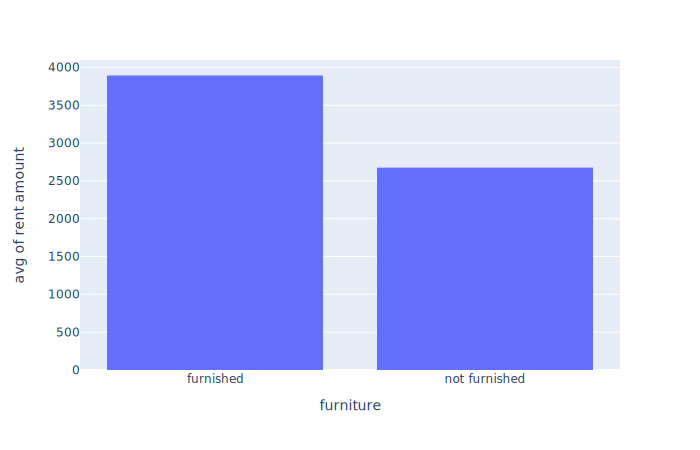

In [50]:
ch11_furn_t=px.histogram(data_frame=final_data, x='furniture', y='rent amount',
            histfunc='avg')

ch11_furn_t.show('svg')

The average rent amount is 45,53% higher in furnished properties. Therefore, we can state that furnishing has a significant impact on rent.

### Conclusion:

The area of the property and the number of bathrooms it has are the variables that tend to generate a higher impact on rent. With respect to the categorical variables, we can highlight that the average rent charged for furnished properties is 45,53% higher than the ones without furniture. 

### Thank you!